In [1]:
import numpy as np
from pymab.policies.greedy import GreedyPolicy
from pymab.policies.epsilon_greedy import EpsilonGreedyPolicy
from pymab.policies.ucb import UCBPolicy
from pymab.policies.thompson_sampling import ThompsonSamplingPolicy
from pymab.game import Game

In [2]:
n_bandits = 10

In [3]:
ucb_non_stationary_policy = UCBPolicy(
    n_bandits=10,
    c=1,
    is_stationary=False,
    sliding_window_size=1000,  # or use discount_factor=0.9
)

In [4]:
non_stationary_game = Game(
    n_episodes=1000,
    n_steps=2000,
    policies=[ucb_non_stationary_policy],
    n_bandits=10,
    is_stationary=False,
    change_frequency=100,
    change_magnitude=0.1
)

In [5]:
# Run the game
non_stationary_game.game_loop()

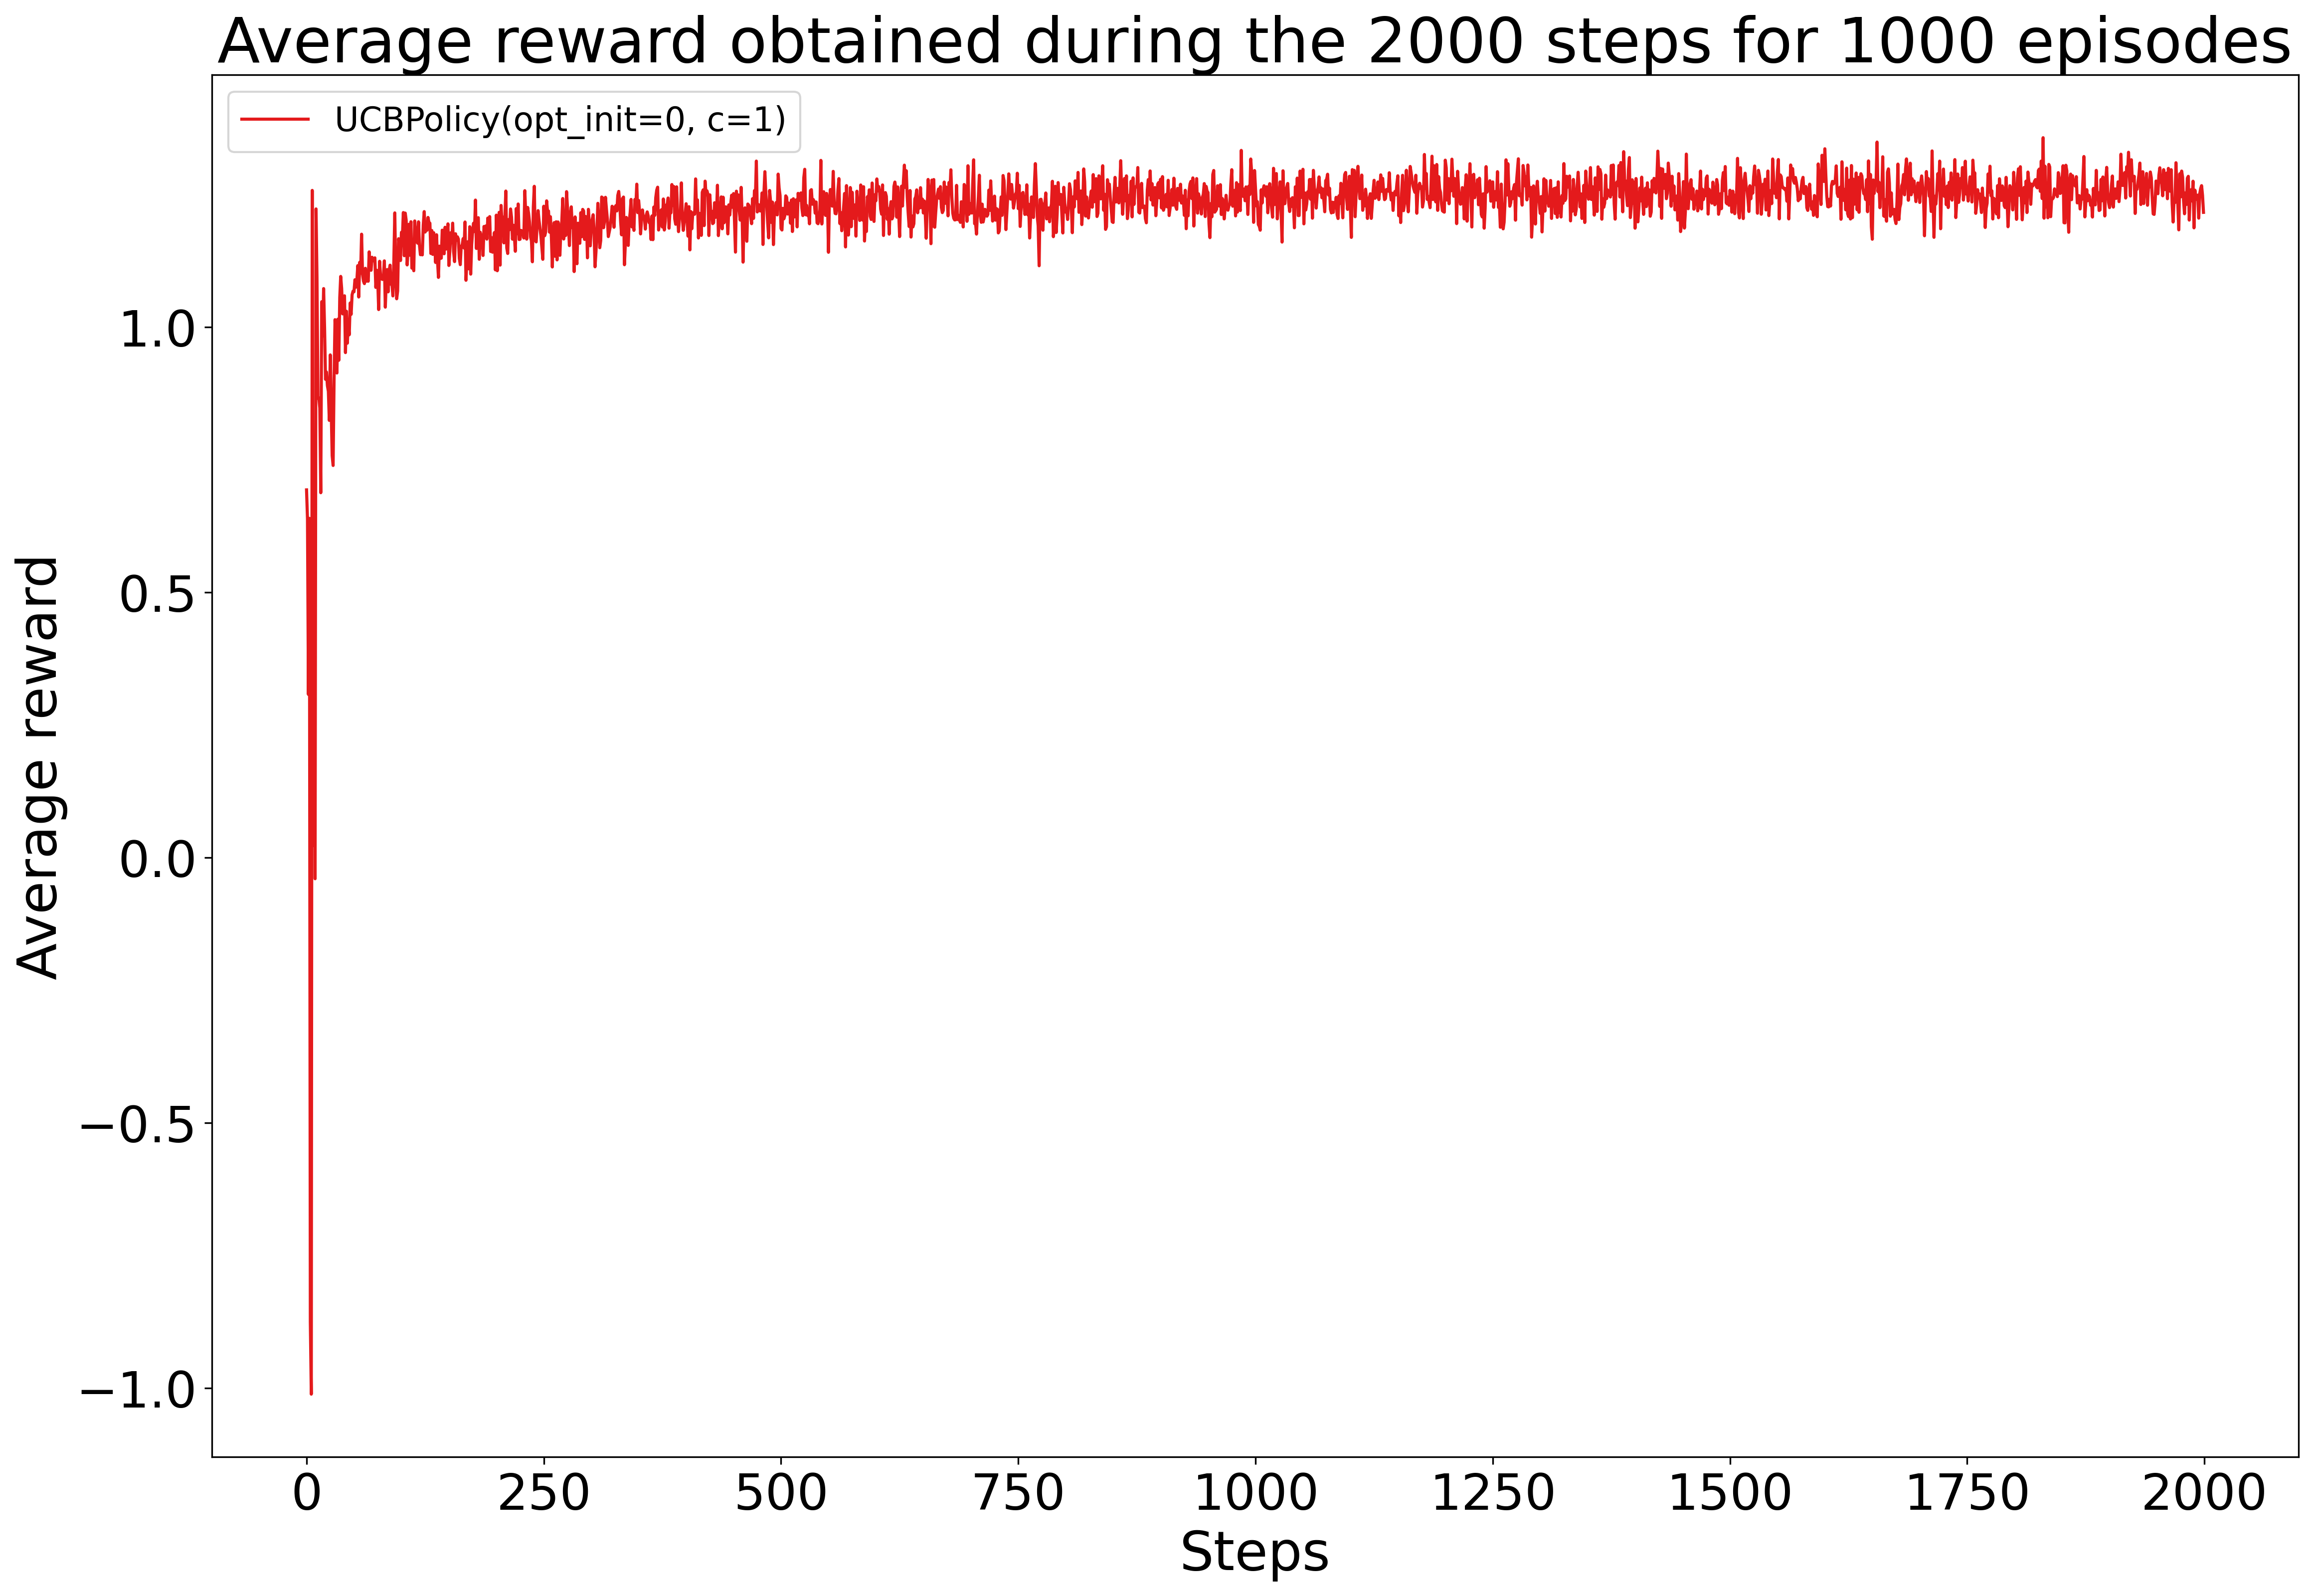

In [6]:
# Plot the results
non_stationary_game.plot_average_reward_by_step()

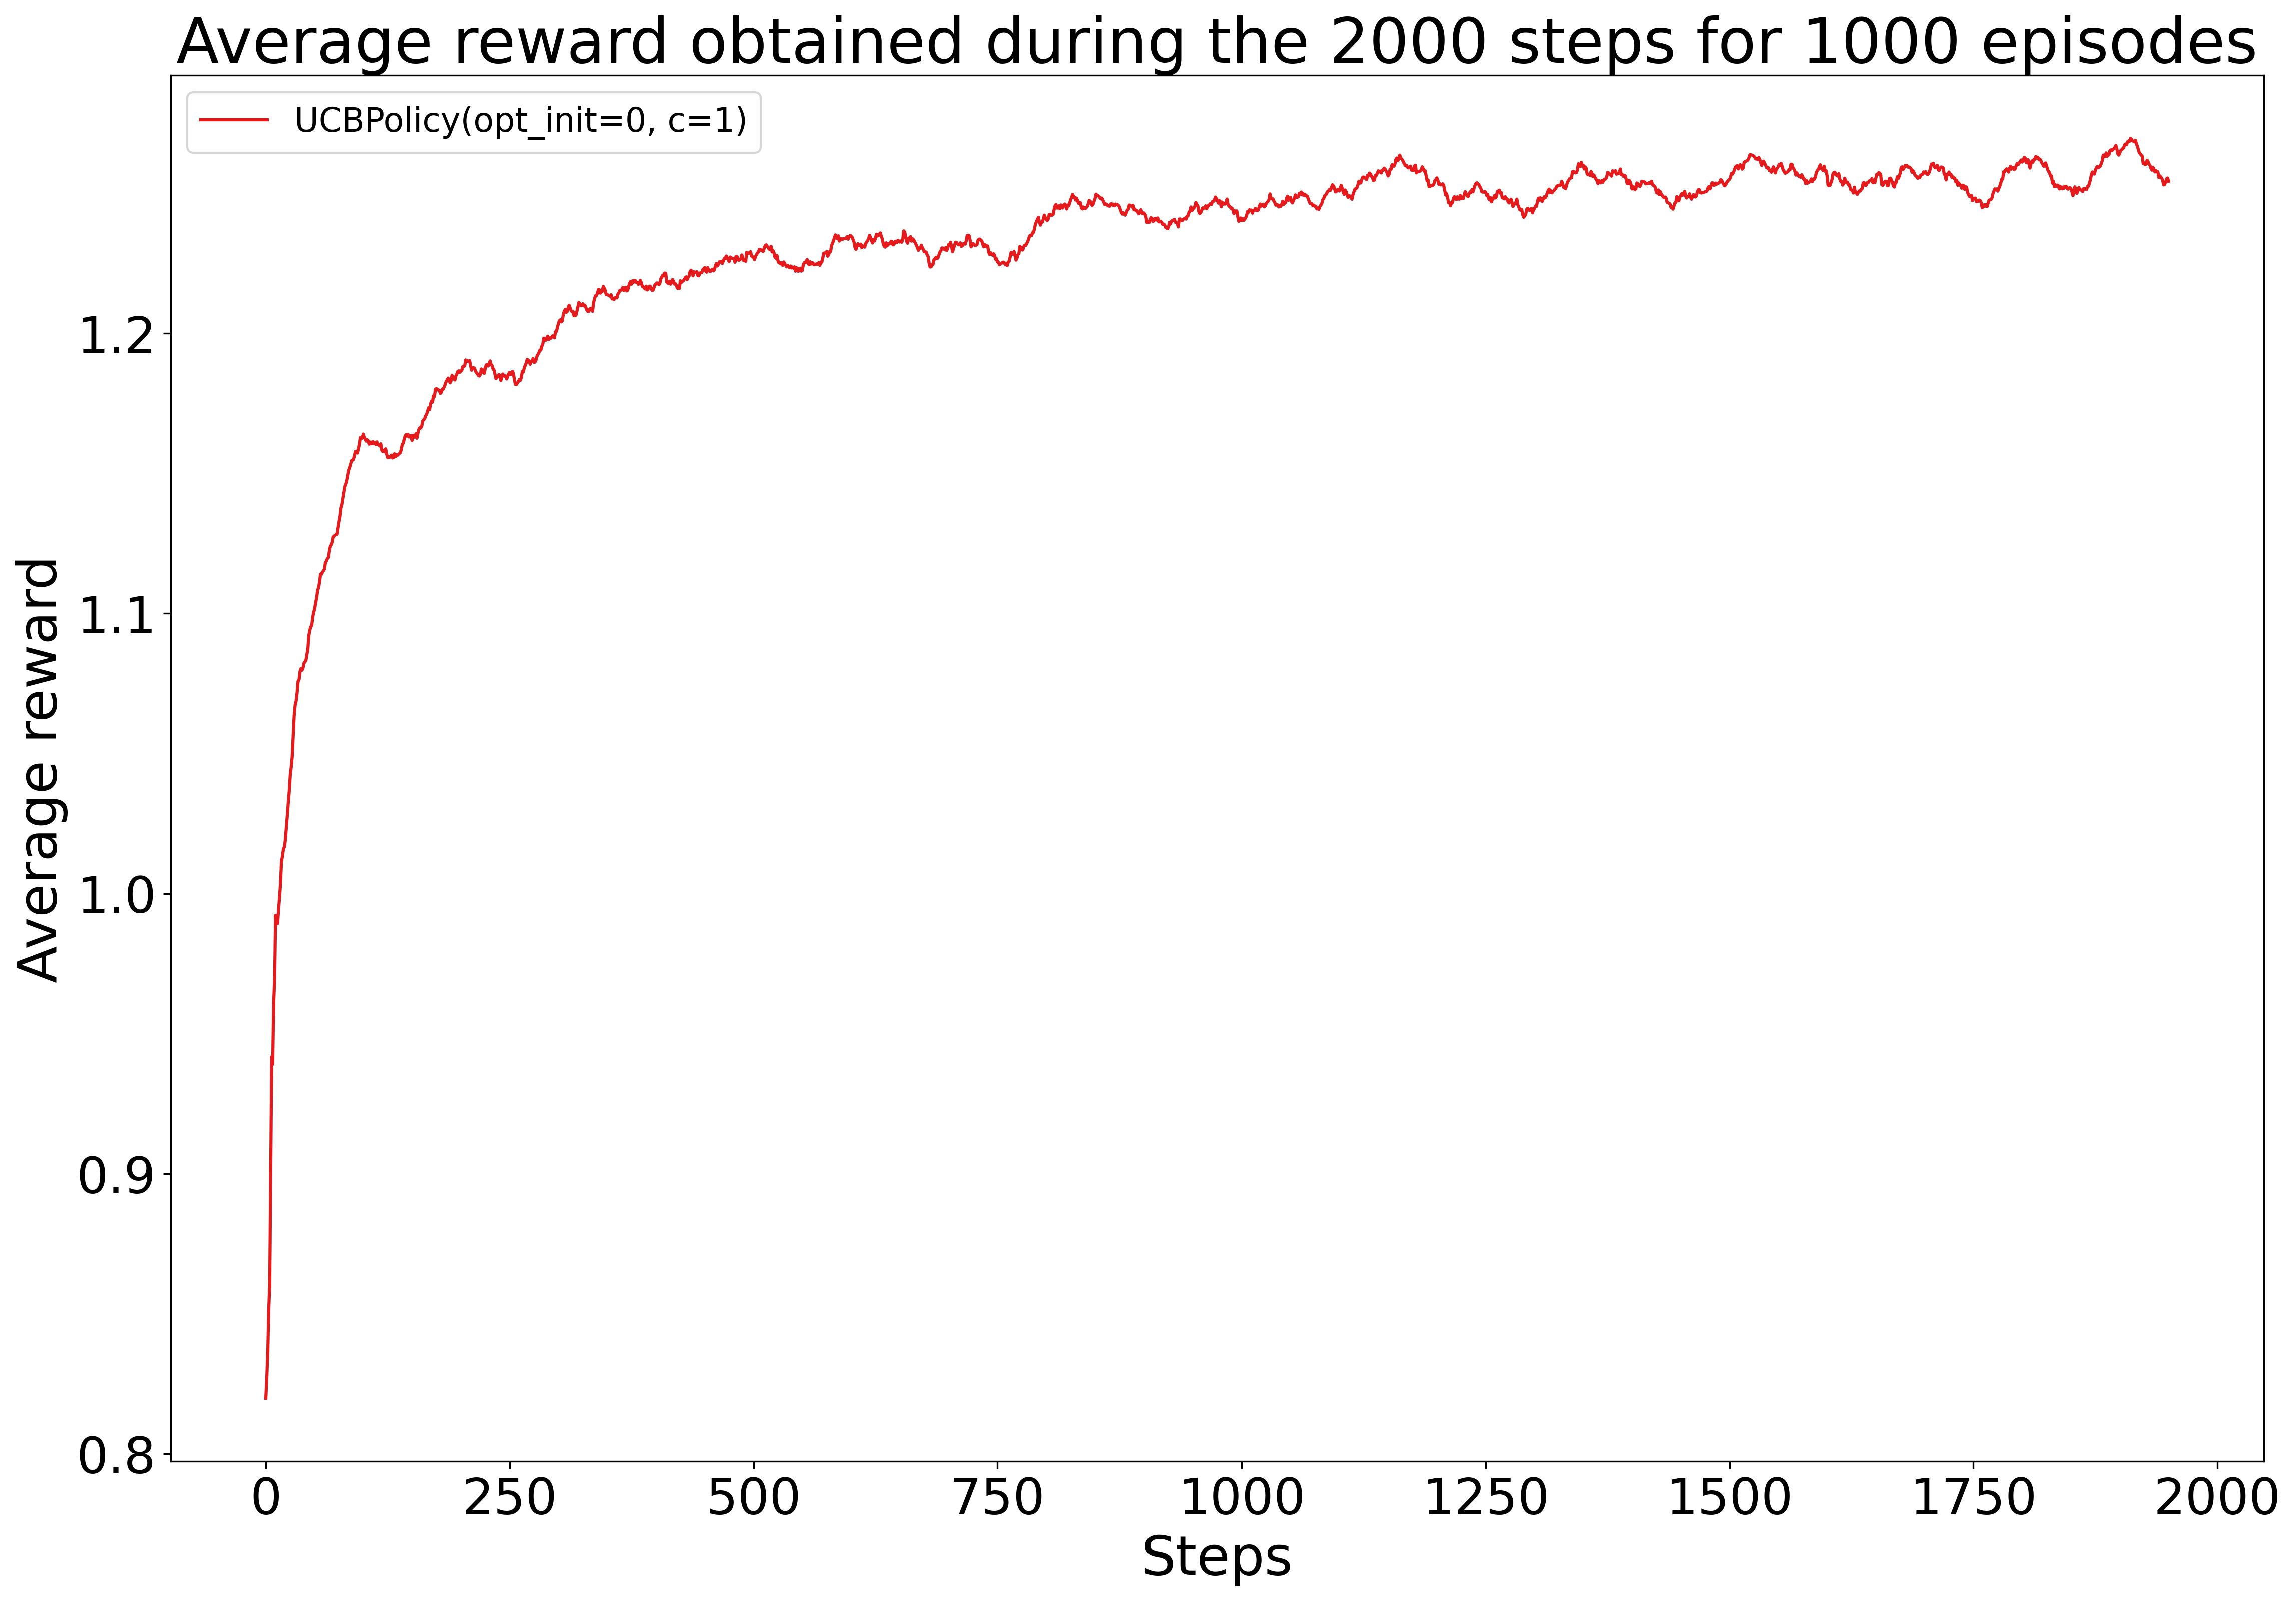

In [7]:
non_stationary_game.plot_average_reward_by_step_smoothed()

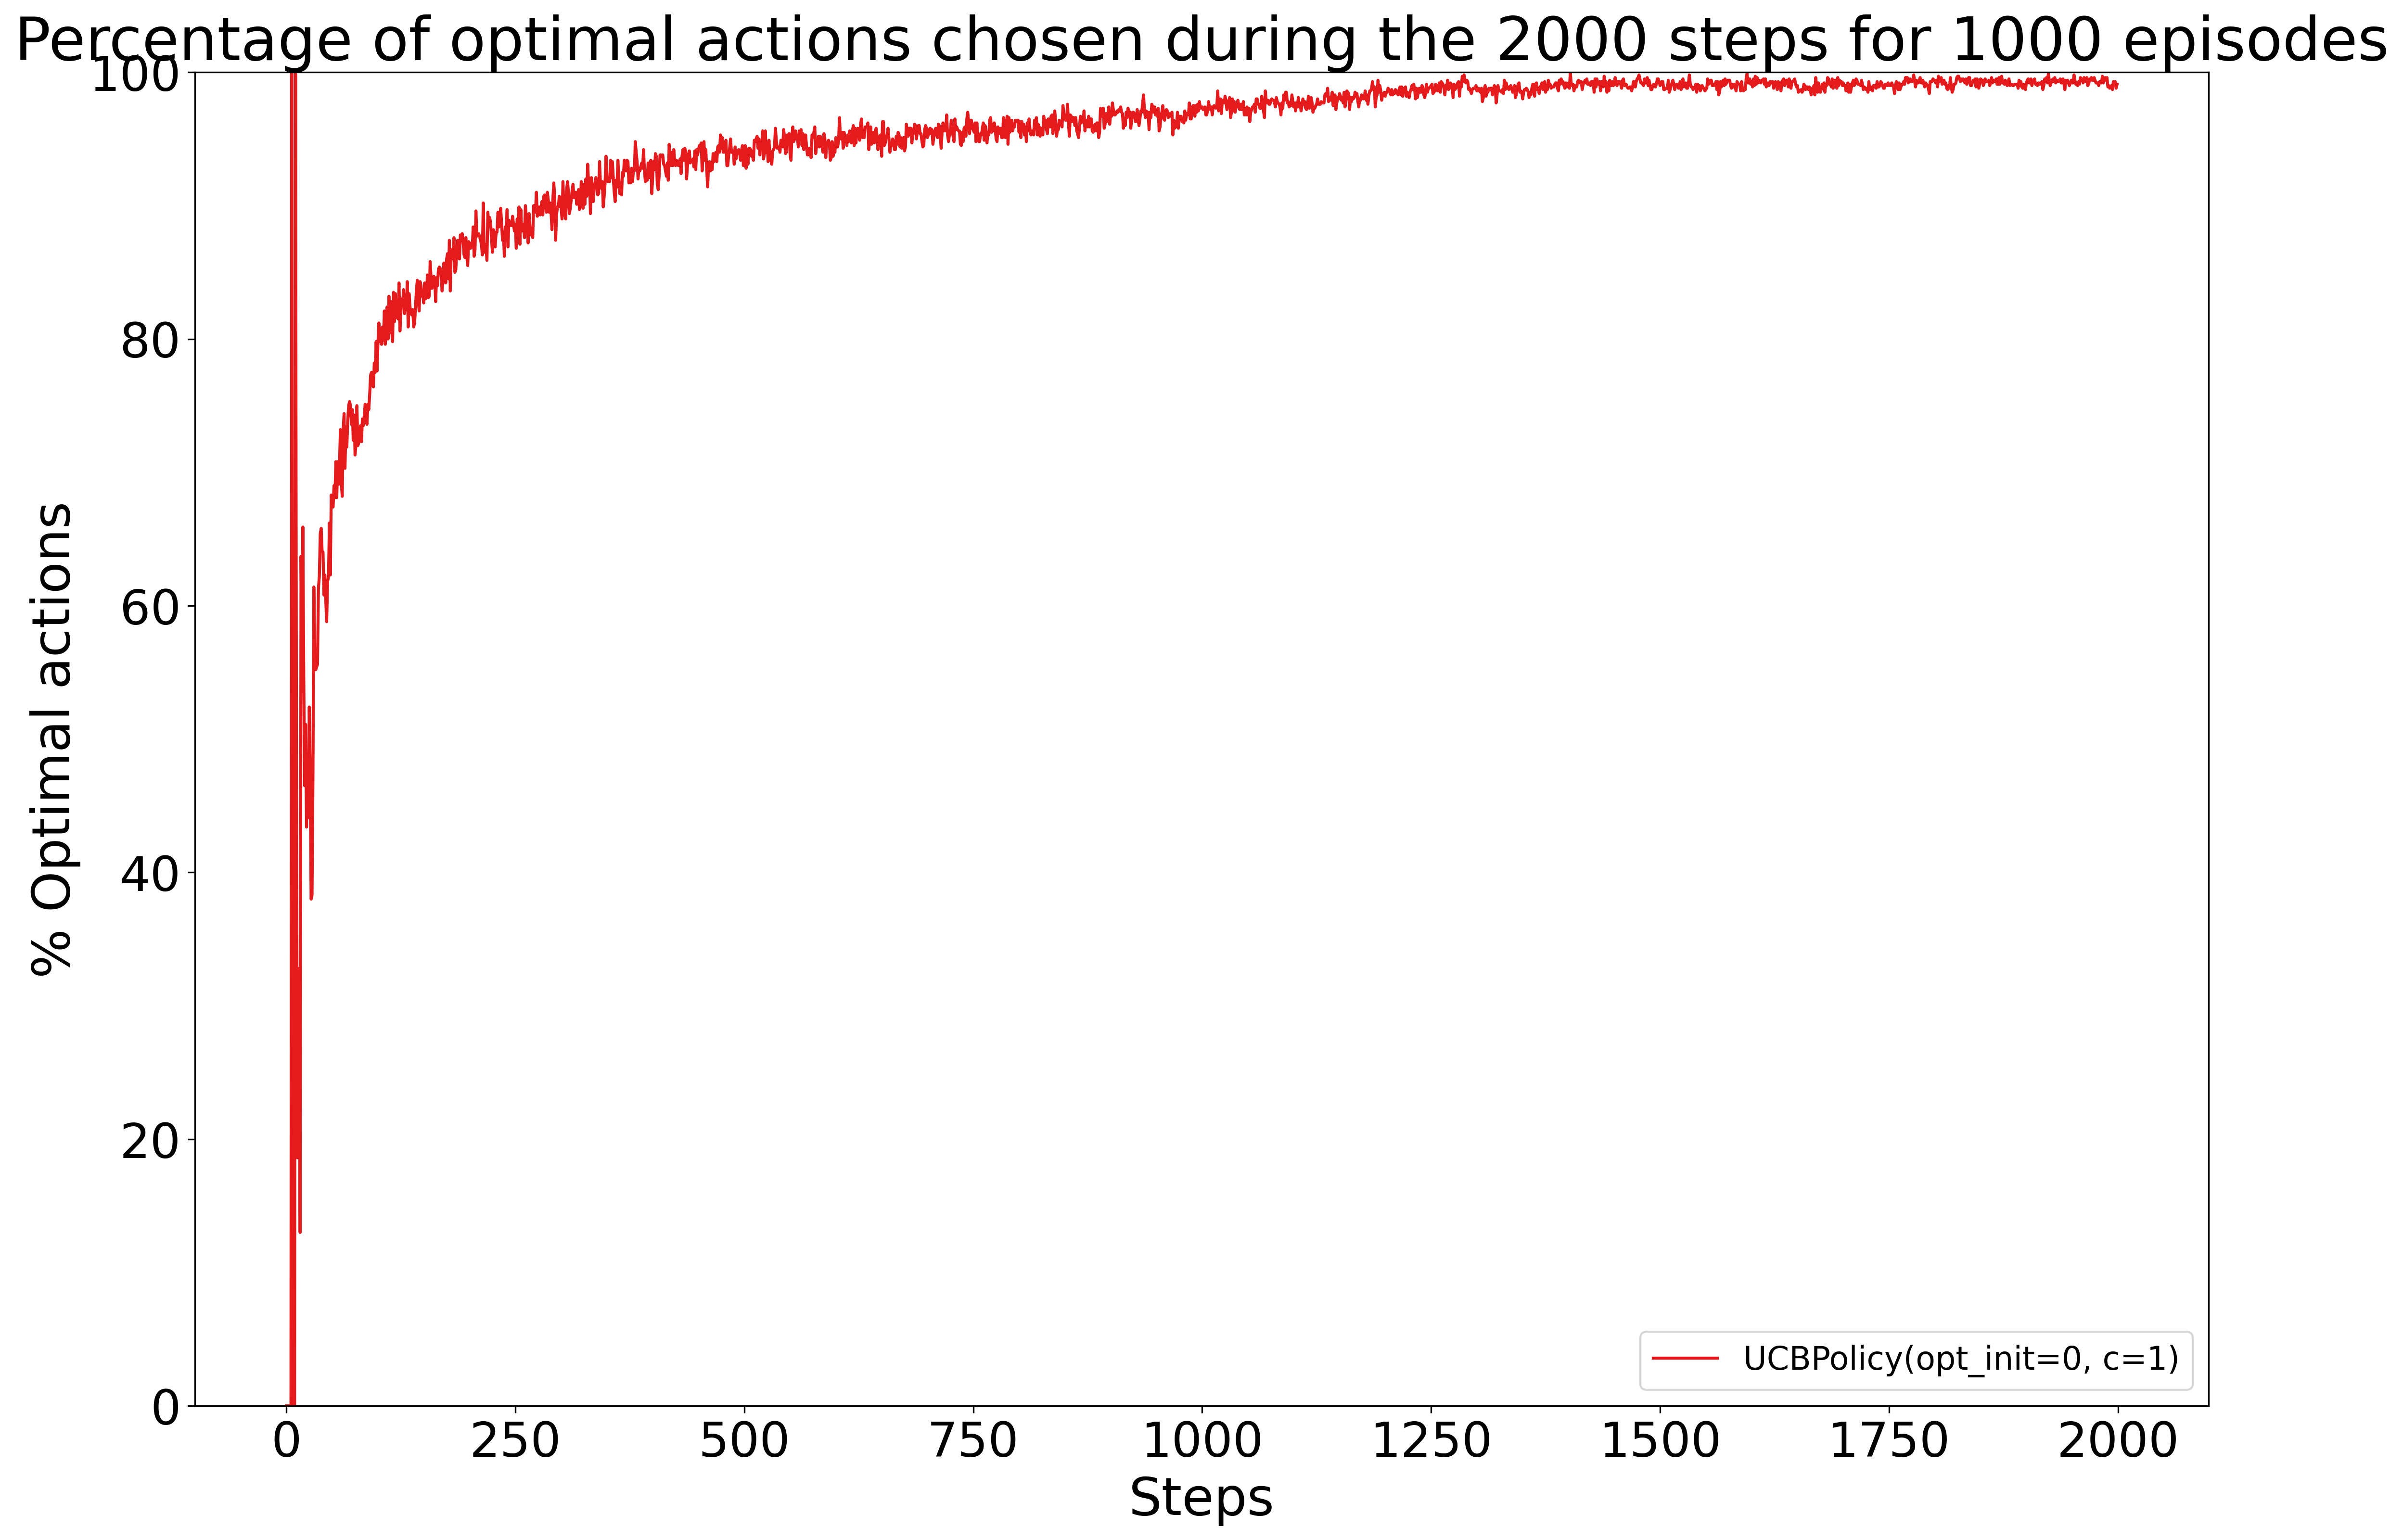

In [8]:
non_stationary_game.plot_rate_optimal_actions_by_step()

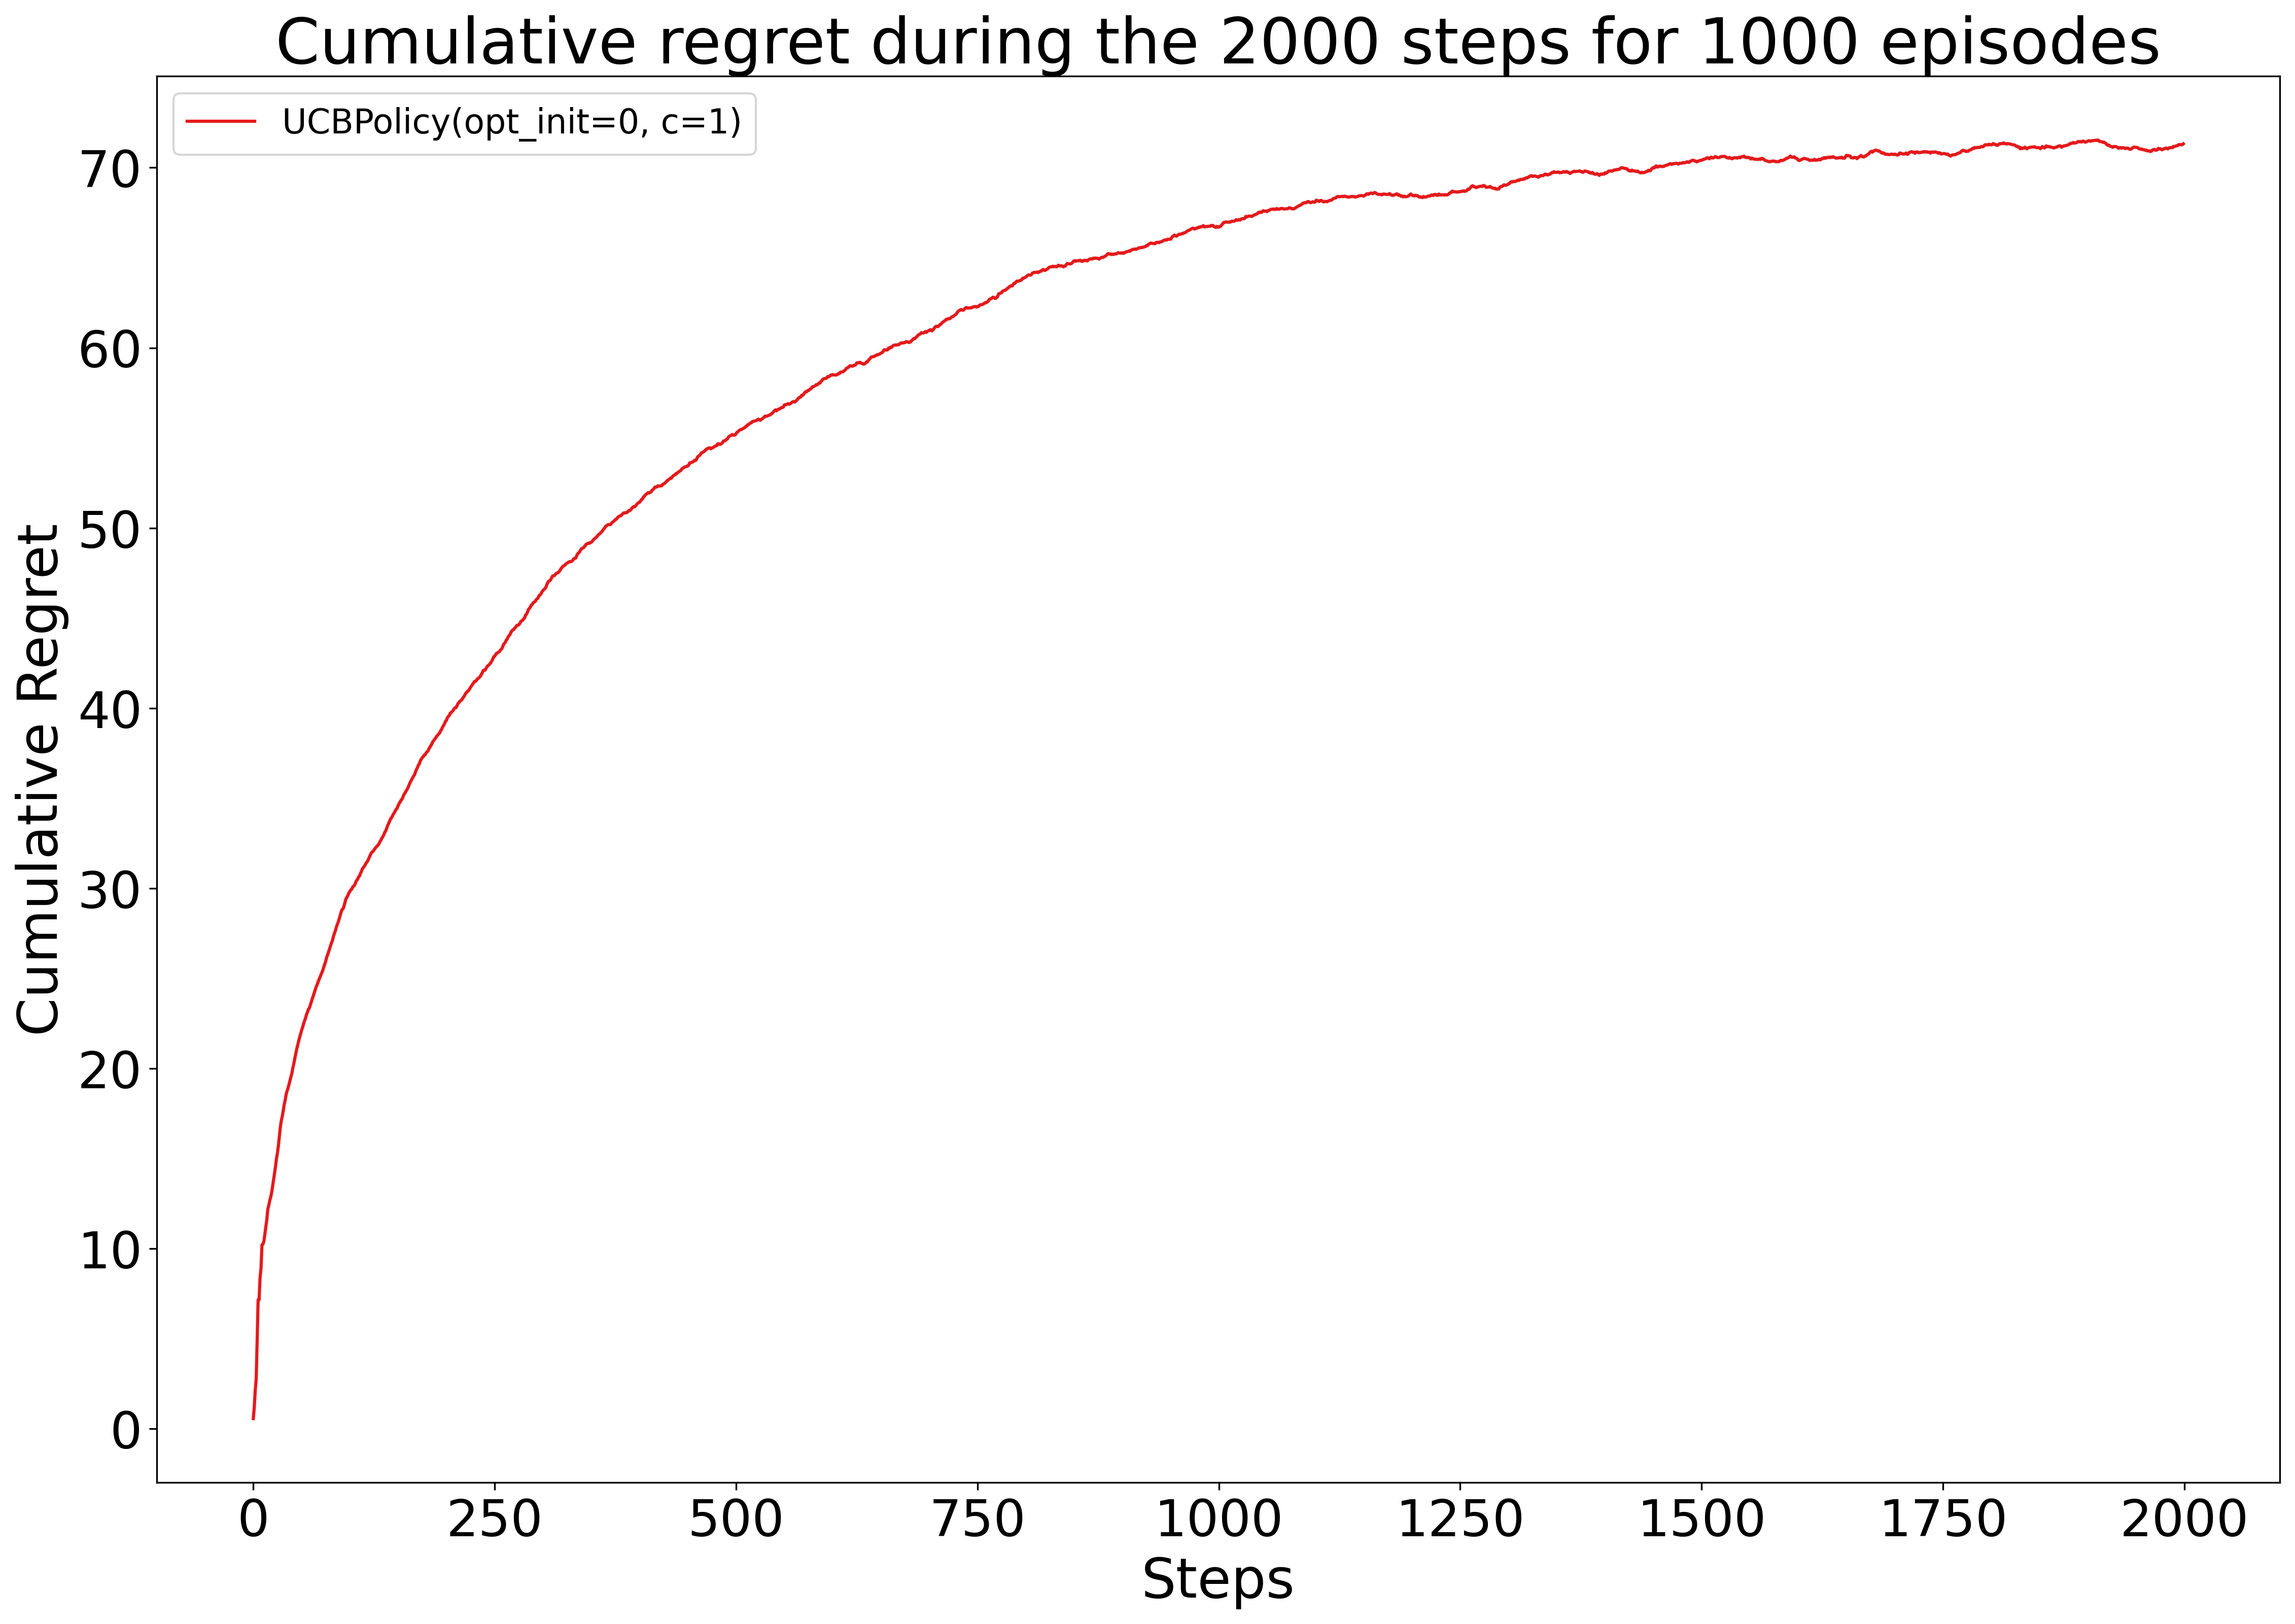

In [9]:
non_stationary_game.plot_cumulative_regret_by_step()

In [10]:
ucb_stationary_policy = UCBPolicy(
    n_bandits=10,
    c=1,
)

In [11]:
stationary_game = Game(
    n_episodes=1000,
    n_steps=2000,
    policies=[ucb_stationary_policy],
    n_bandits=10,
)

In [12]:
stationary_game.game_loop()

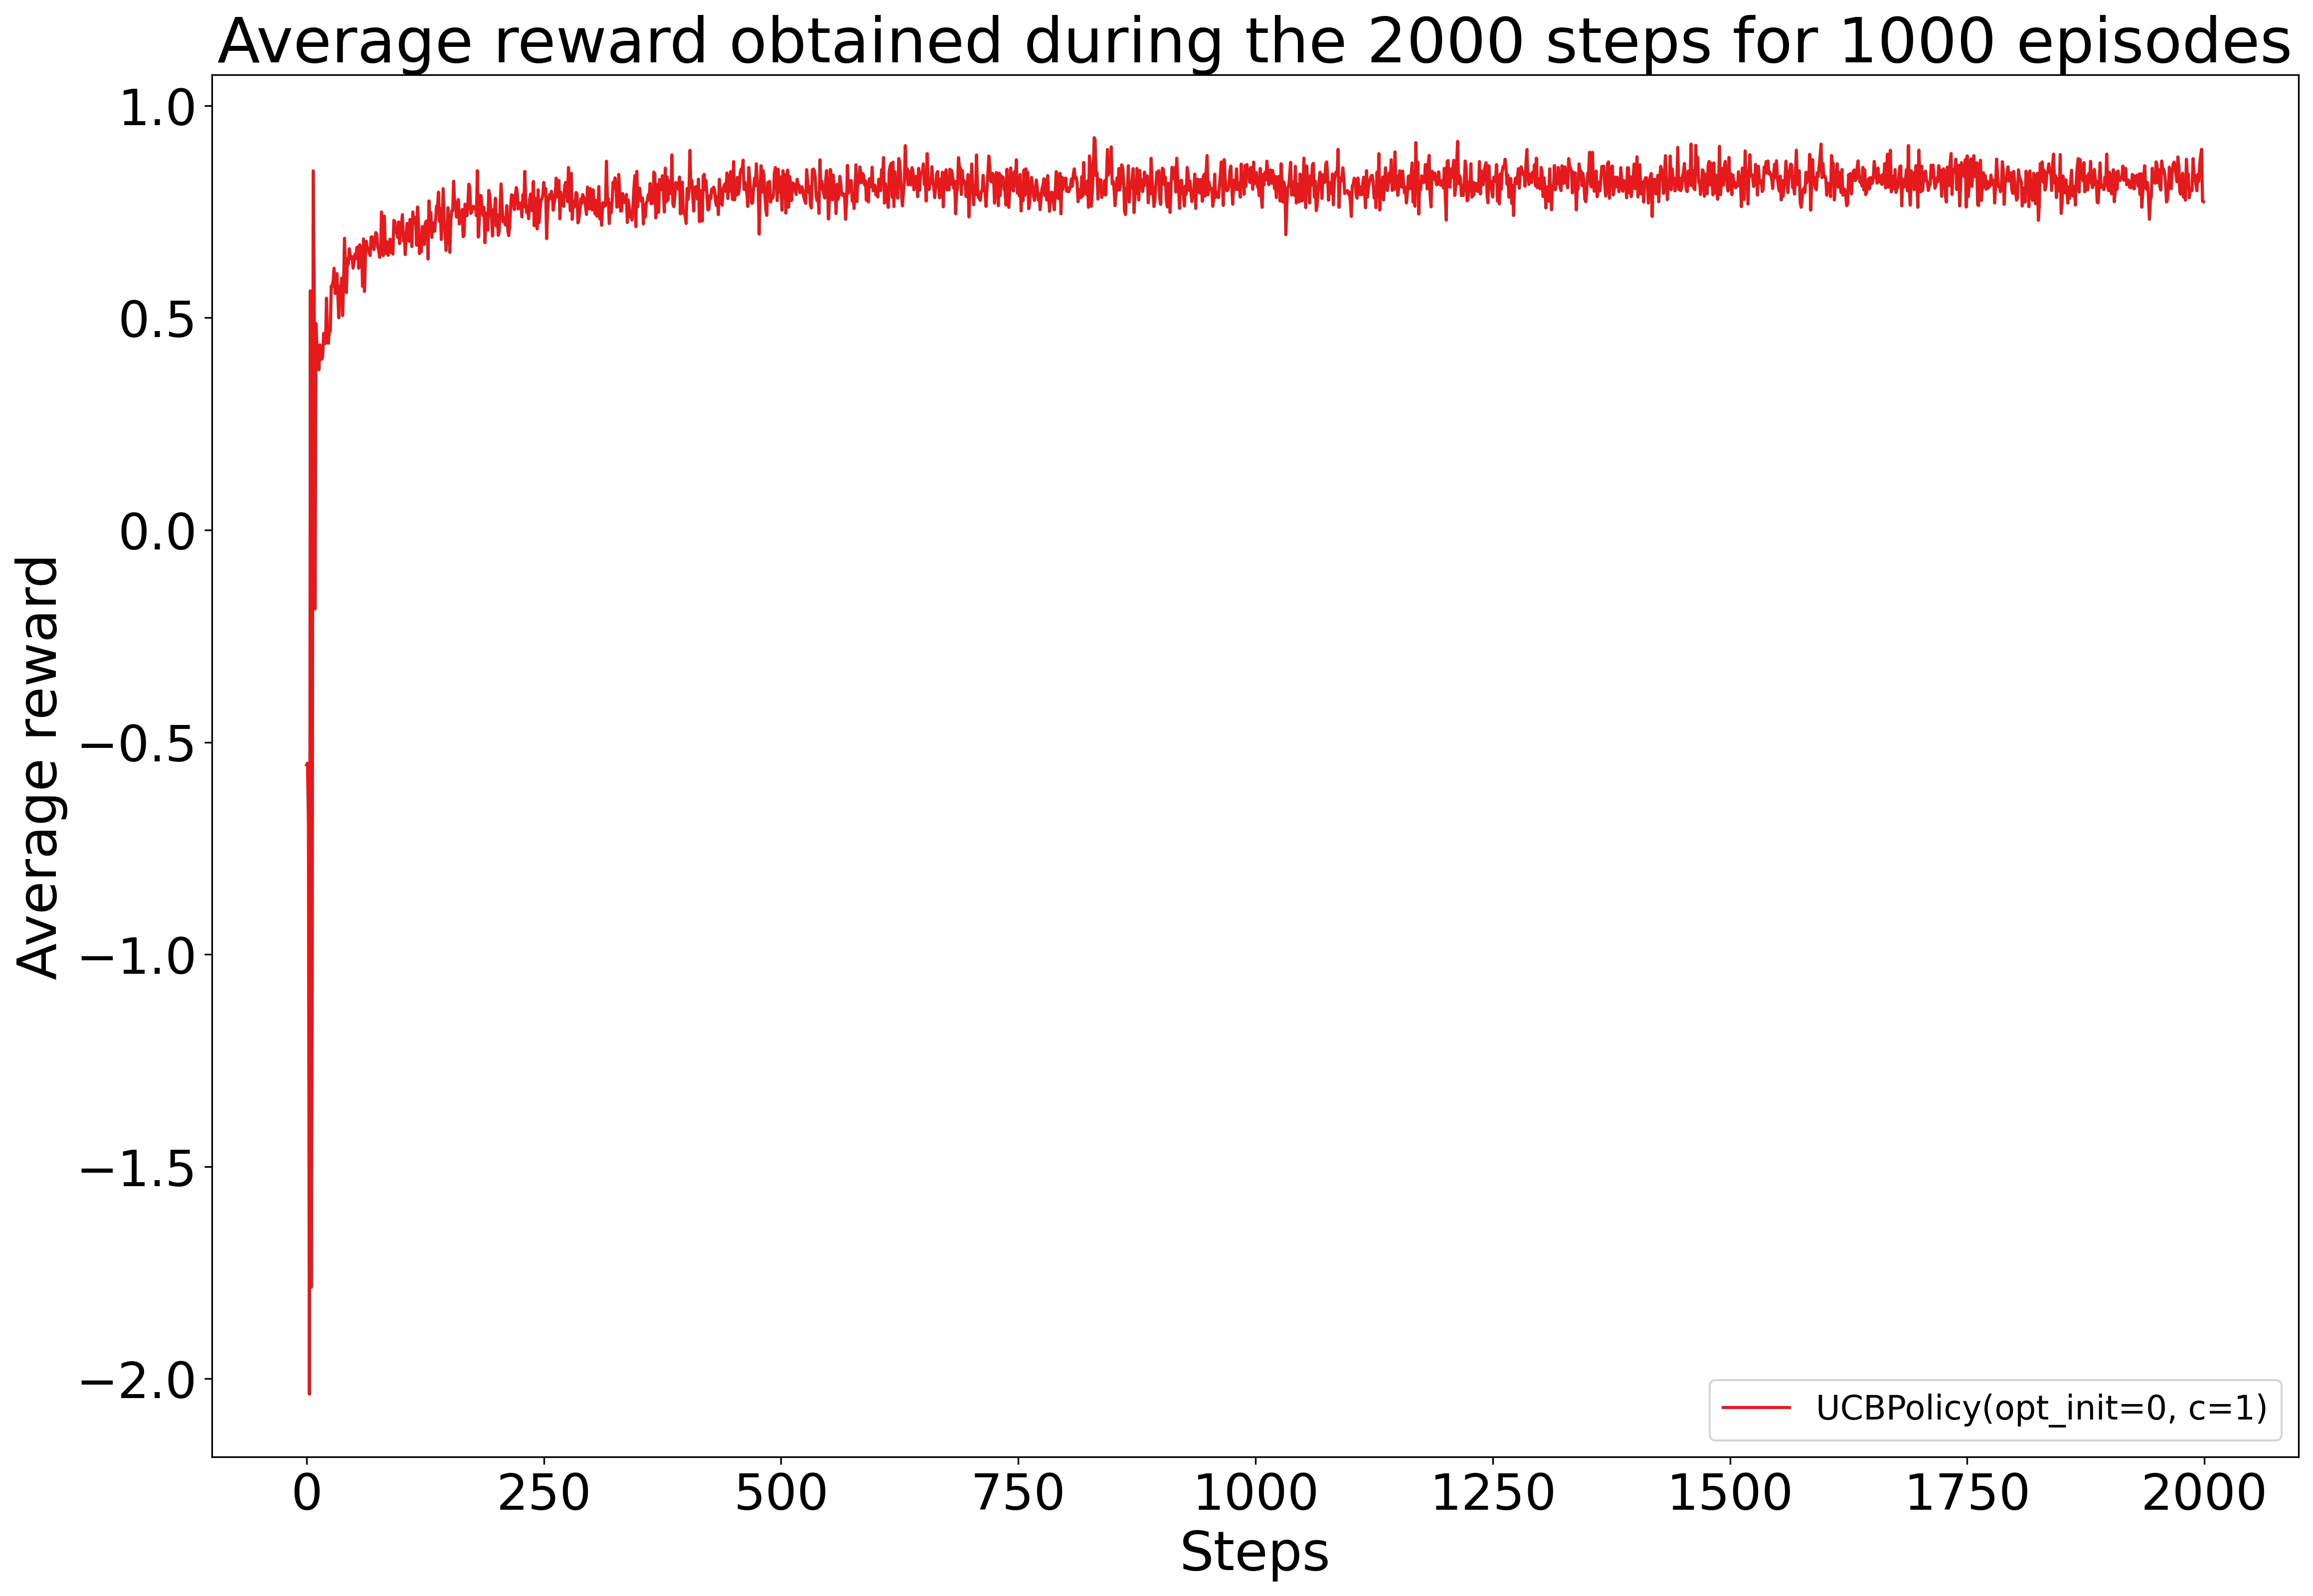

In [13]:
stationary_game.plot_average_reward_by_step()

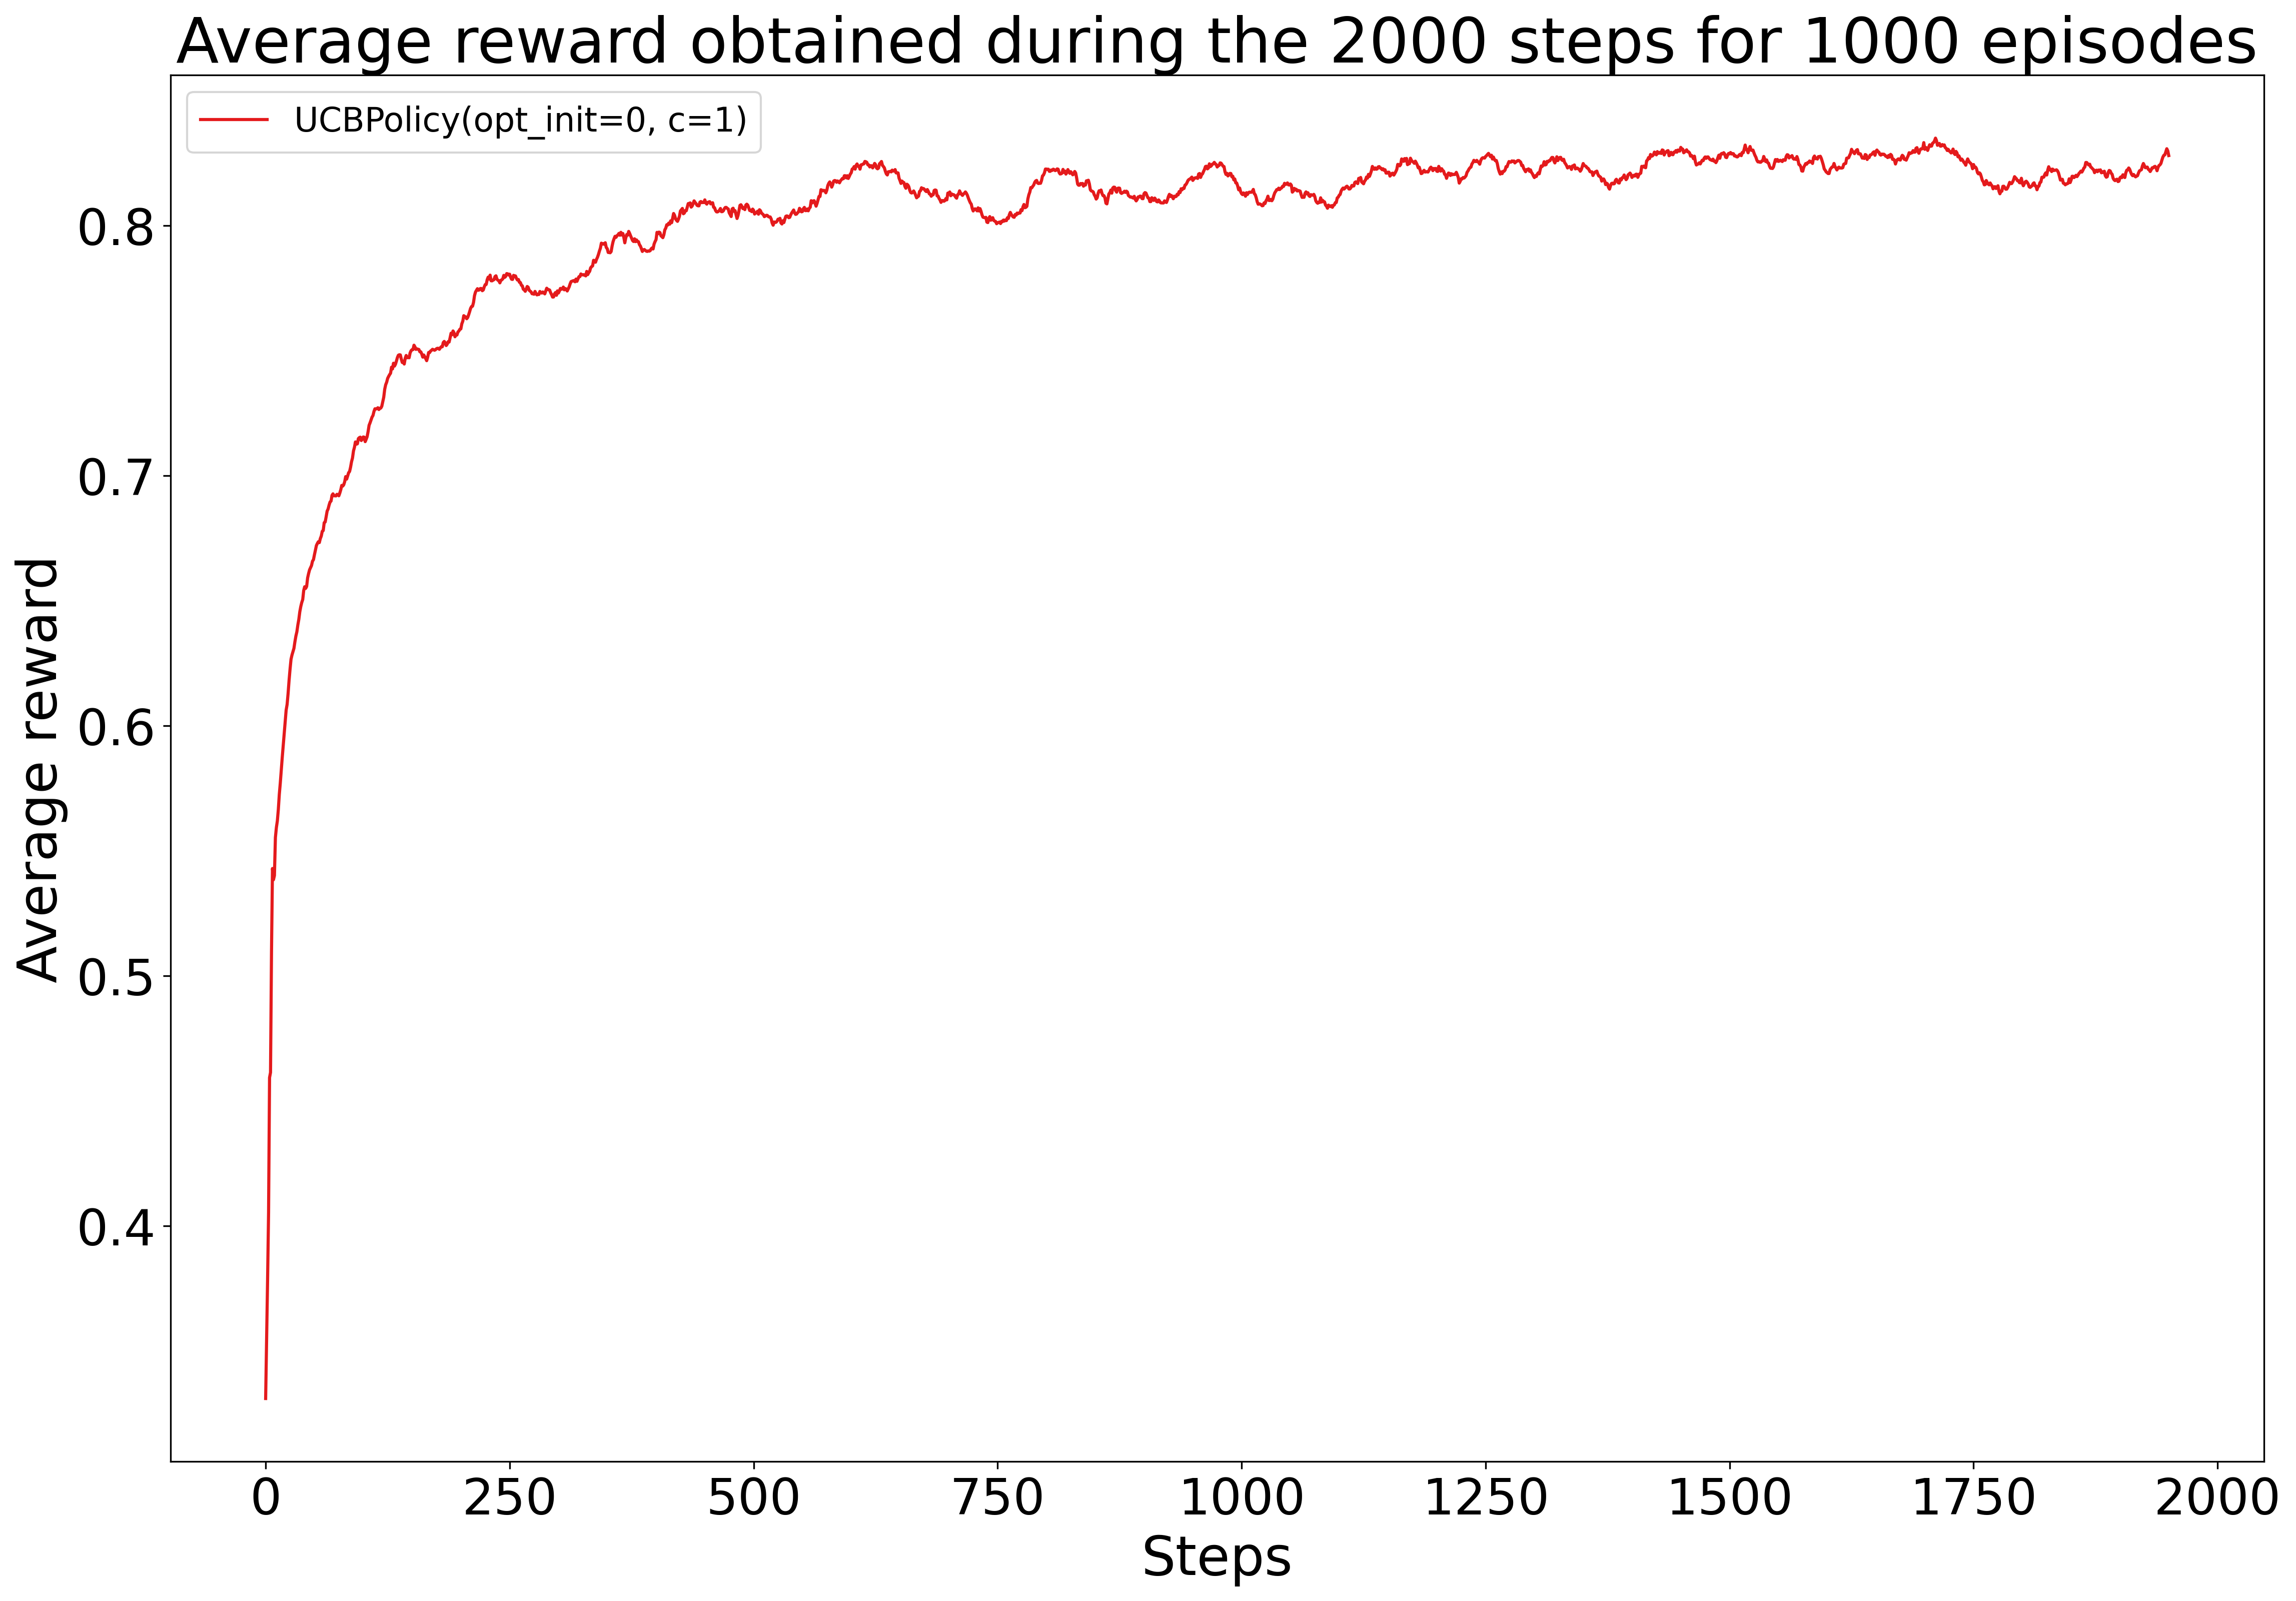

In [14]:
stationary_game.plot_average_reward_by_step_smoothed()

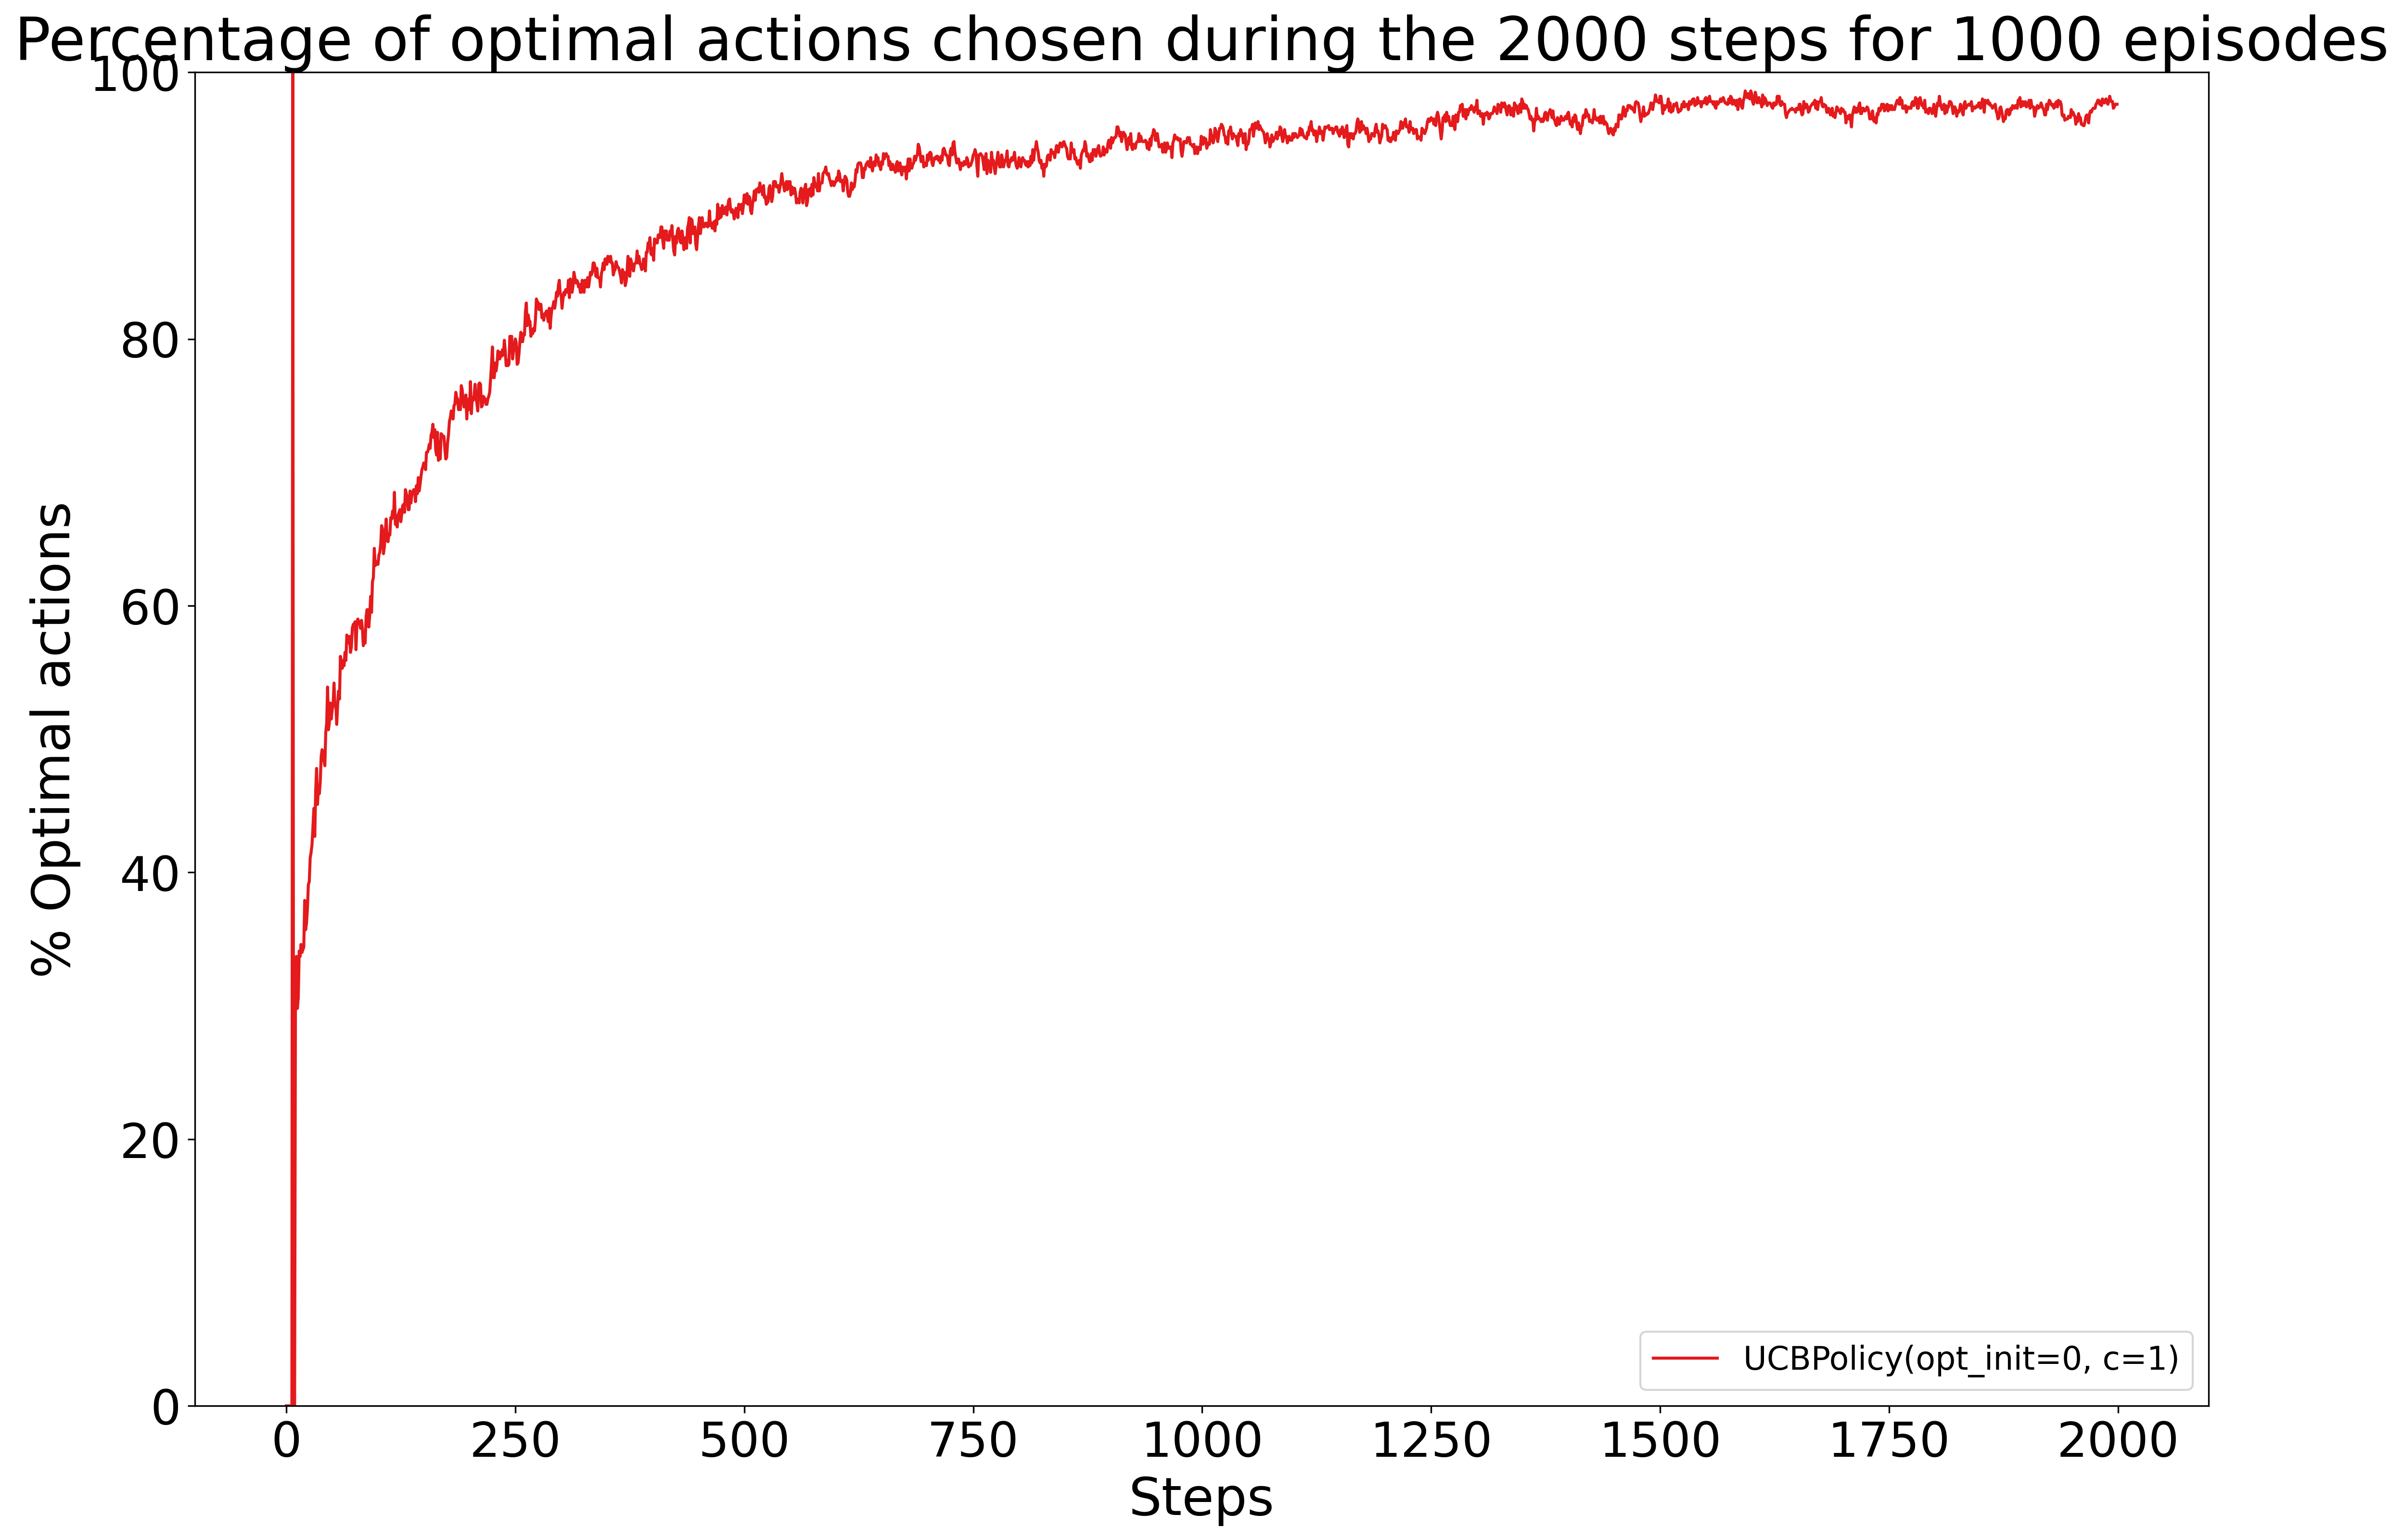

In [15]:
stationary_game.plot_rate_optimal_actions_by_step()

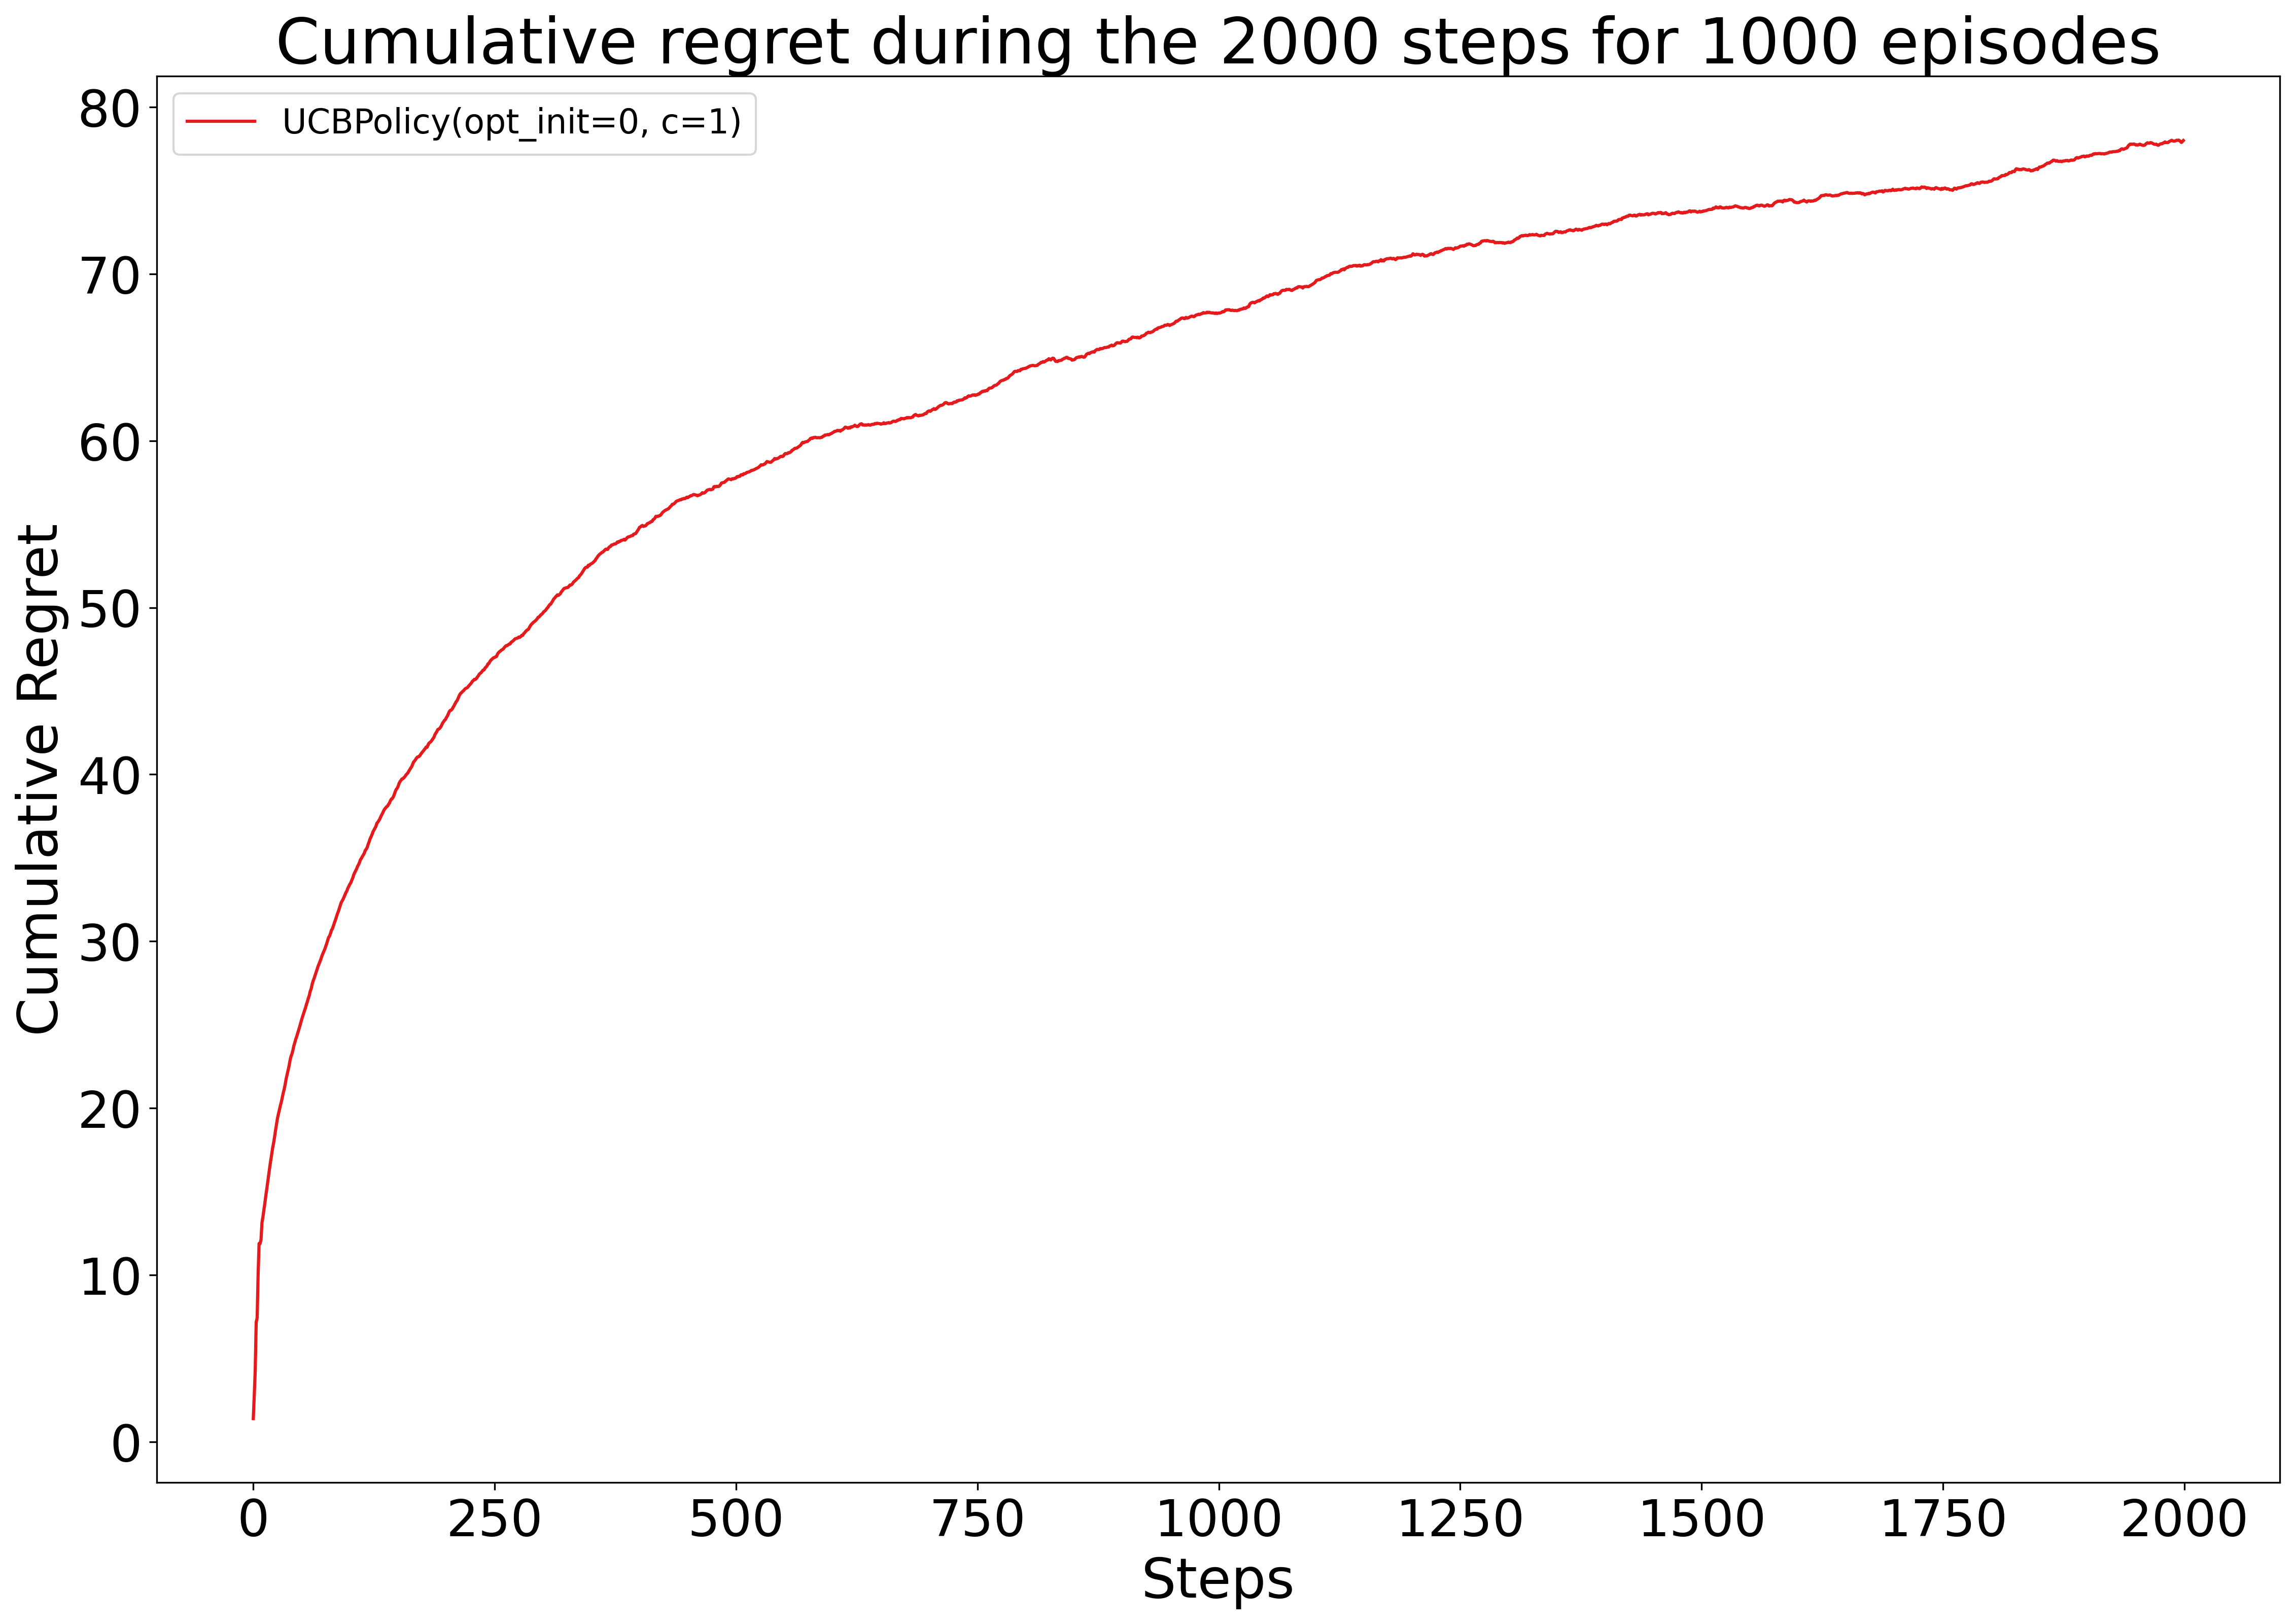

In [16]:
stationary_game.plot_cumulative_regret_by_step()

## Summary
### None Stationary Environment
In a non-stationary environment, the true underlying reward distributions of the arms change over time.

### Stationary Environment
In a stationary environment, the true underlying reward distributions of the arms do not change over time.
* Initially, it will explore all arms to build reliable estimates.
* Over time, it will concentrate more on the arms that appear to be better, but will still occasionally explore less promising arms.
* It has a good chance of converging to the optimal arm, even if initial estimates are noisy.